# OpenSBLI Benchmark

This notebook compares the peformance of the OpenSBLI Taylor-Green vortex benchmark on different systems.

Performance is compared using iterations per second.

## Setup Section

In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip, sysinfo
from appanalysis import osbli
plotcores = True
unitlabel = "Nodes"
if plotcores:
    unitlabel = "Cores"

## Read data files

In [4]:
sysdetails = sysinfo.getdetails('../../../systems.yaml')

../../../python-modules/utilities/sysinfo.py:6: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  systems = yaml.load(input)


In [5]:
systems = ['ARCHER','Cirrus','Thomas','CSD3-Skylake','ARCHER2']
perf = {}
notes = {}
names = {}
nodes = {}
perf_max = {}
cpn = {}

for system in systems:
    wdir = '../TGV1024ss/results/' + system
    filelist = filemanip.get_filelist_ext(wdir, 'iter')
    sysdict = sysdetails[system]
    names[system] = sysdict['Name']
    cpn[system] = sysdict['PCores']*sysdict['PPerNode']
    print('\n============================================================')
    print(sysdict['Name'])
    osbli_df = pd.DataFrame(osbli.create_df_list(filelist, sysdict['PCores']*sysdict['PPerNode']))
    nodes[system], perf_max[system] = osbli.get_perf_stats(osbli_df, 'max', writestats=True, plotcores=plotcores)
    print('\n============================================================')

../TGV1024ss/results/ARCHER/*.iter

ARCHER
                 Perf                               Count
                  min    median       max      mean   sum
Nodes Cores                                              
5     120    0.052917  0.052917  0.052917  0.052917     1
20    480    0.213463  0.213463  0.213463  0.213463     1
40    960    0.402617  0.402617  0.402617  0.402617     1
80    1920   0.505124  0.507136  0.509149  0.507136     2
160   3840   1.919198  1.919198  1.919198  1.919198     1
256   6144   2.737371  2.737371  2.737371  2.737371     1
384   9216   4.261812  4.261812  4.261812  4.261812     1
512   12288  5.542193  5.542193  5.542193  5.542193     1
640   15360  5.429589  5.429589  5.429589  5.429589     1
768   18432  7.923554  7.923554  7.923554  7.923554     1
896   21504  9.524172  9.524172  9.524172  9.524172     1

../TGV1024ss/results/Cirrus/*.iter

Cirrus
                 Perf                               Count
                  min    median       max  

## Plot performance

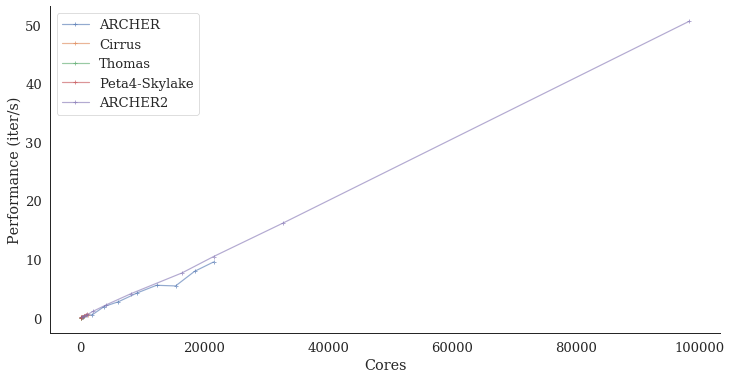

In [6]:
for system in systems:
    plt.plot(nodes[system], perf_max[system], '-+', label=names[system], alpha=0.6)
plt.xlabel(unitlabel)
plt.ylabel('Performance (iter/s)')
plt.legend(loc='best')
sns.despine()

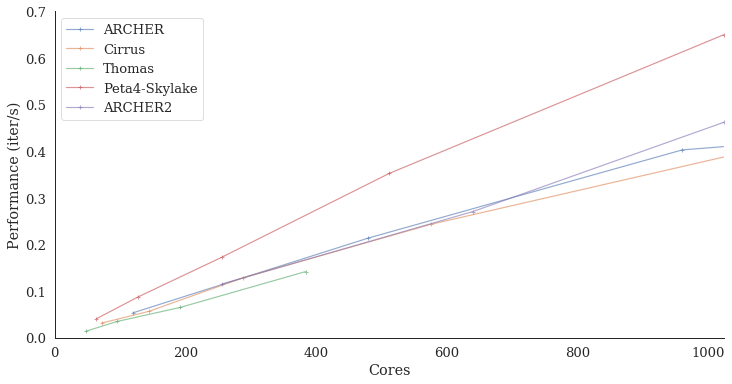

In [7]:
for system in systems:
    plt.plot(nodes[system], perf_max[system], '-+', label=names[system], alpha=0.6)
plt.xlabel(unitlabel)
plt.xlim([0,1024])
plt.ylim([0,0.7])
plt.ylabel('Performance (iter/s)')
plt.legend(loc='best')
sns.despine()